![aa](https://i.imgur.com/NVedqdP.png)

---
### Name : Paluadi Surya
### Role   : Business Analyst
---


### Problem Background:
An experiment to test content was run on one of our games. The experiment had three variants each with a different content set. The aim of the experiment was to determine the variant with the optimum balance of economy, engagement and retention.

In [1]:
#Importing Required Libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from functools import reduce

In [2]:
# Setting up a palette to make plots look cleaner
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Atrition.jpg',
 'BA Assignment.pdf',
 'debug.log',
 'Interaction.jpg',
 'overall_economy.csv',
 'overall_engagement.csv',
 'overall_retention.csv',
 'PlaySimple.png',
 'PlaySimple_PaluvadiSurya.html',
 'PlaySimple_PaluvadiSurya.ipynb',
 'Trend.png']

In [4]:
# Reading Data Sets
cash_df = pd.read_csv('overall_economy.csv')
action_df = pd.read_csv('overall_engagement.csv')
ret_df = pd.read_csv('overall_retention.csv')

In [5]:
# Checking if the data provided is connected or not based on date fields
sorted(pd.to_datetime(cash_df.date_field).unique()) == sorted(pd.to_datetime(action_df.date_field).unique()) == sorted(pd.to_datetime(cash_df.date_field).unique()) == sorted(pd.to_datetime(ret_df.date_field).unique())

True

In [6]:
# Checking sample of the dataset
cash_df.head()

,cash_per_dau,cash_per_user,cli,date_field,dau,earn_type,experiment,gid,total_cash,users,variant_group,version
0,49.216679,52.369801,0,2015-09-16,8238,earn,content,4,405447,7742,3,2
1,10.378733,814.285714,0,2015-09-16,8238,purchase,content,4,85500,105,3,2
2,9.100811,844.943820,0,2015-09-05,8263,purchase,content,4,75200,89,3,2
3,-69.799104,-98.270574,0,2015-09-05,8263,spend,content,4,-576750,5869,3,2
4,9.456424,979.069767,0,2015-09-13,8904,purchase,content,4,84200,86,3,2


In [7]:
# Finding out some of the categorica variables with numericals as thier values for analysis
print("Unique values of columns are")
print('----------------------------------------')
for i in cash_df.columns:
    if cash_df[i].nunique() < 50:
        print(f'{str(i)} : {sorted(cash_df[i].unique())}')
        print('----------------------------------------')

Unique values of columns are
----------------------------------------
cli : [0]
----------------------------------------
date_field : ['2015-08-24', '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28', '2015-08-29', '2015-08-30', '2015-08-31', '2015-09-01', '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-05', '2015-09-06', '2015-09-07', '2015-09-08', '2015-09-09', '2015-09-10', '2015-09-11', '2015-09-12', '2015-09-13', '2015-09-14', '2015-09-15', '2015-09-16']
----------------------------------------
earn_type : ['earn', 'purchase', 'spend']
----------------------------------------
experiment : ['content']
----------------------------------------
gid : [4]
----------------------------------------
variant_group : [1, 2, 3]
----------------------------------------
version : [2]
----------------------------------------


![](https://i.imgur.com/XcdWa4E.png)

###### There is a consistent rise of daily active users day by day and Variant 3 Leads the role in terms of users

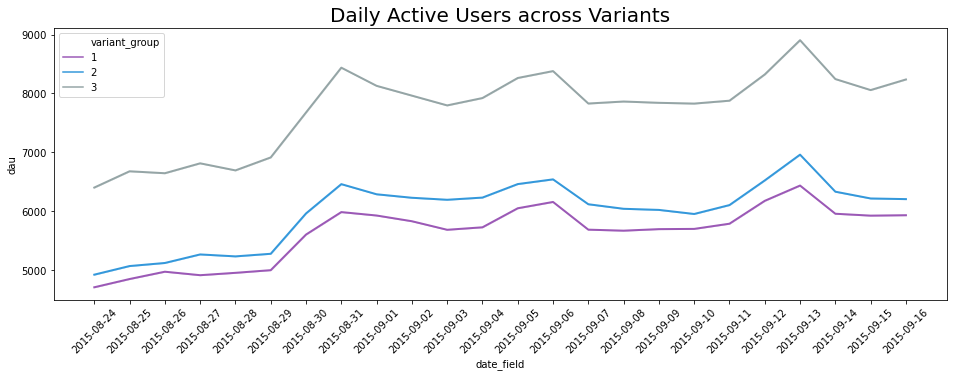

In [8]:
plt.figure(figsize=(16,5))
plt.title('Daily Active Users across Variants', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Daily Active Users')
plt.xticks(rotation=45)
sns.lineplot(cash_df.date_field, cash_df.dau, hue=cash_df.variant_group, palette=sns.color_palette(flatui)[:3], linewidth=2)

- Undertanding the distribution of cash per daily actie users across different variants

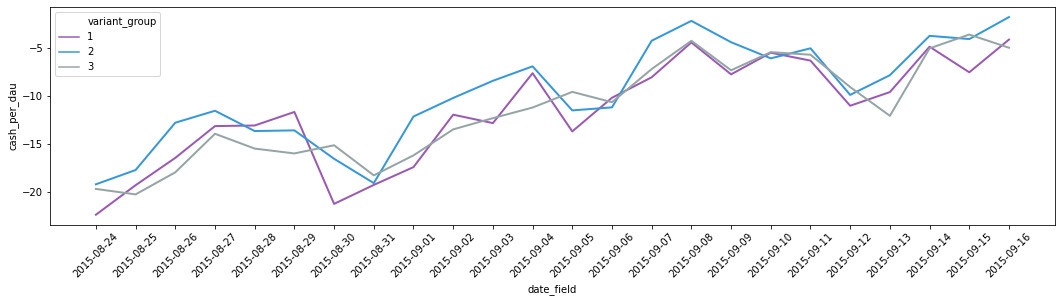

In [9]:
plt.figure(figsize=(18,4))
plt.xticks(rotation=45)
a = pd.DataFrame(cash_df.pivot_table(index=['date_field', 'variant_group'], values=['cash_per_dau'], aggfunc='sum').to_records())
sns.lineplot(a.date_field, a.cash_per_dau, hue=a.variant_group, palette=sns.color_palette(flatui)[:3], linewidth=2)#.invert_yaxis()

- The plots seems a little disturbing but we can barely notice that version 2 is always leading on top of remaining variants respectively

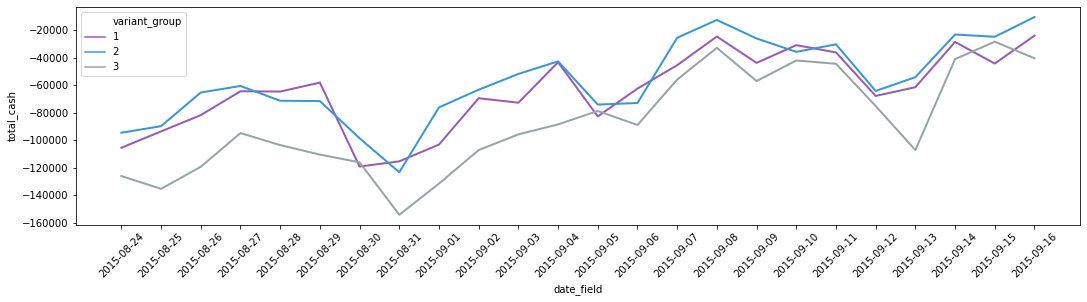

In [10]:
plt.figure(figsize=(18,4))
plt.xticks(rotation=45)
a = pd.DataFrame(cash_df.pivot_table(index=['date_field', 'variant_group'], values=['total_cash'], aggfunc='sum').to_records())
sns.lineplot(a.date_field, a.total_cash, hue=a.variant_group,palette=sns.color_palette(flatui)[:3], linewidth=2)#.invert_yaxis()

In [11]:
# Checking if any outliers were ther in numerical columns
# plt.figure(figsize=(12,16))
# for i in range(1,4):
#     plt.subplot(3,1,i)
#     plt.title('Variant ' + str(i))
#     x = sns.boxplot(cash_df[cash_df.variant_group == i].total_cash, color='#95a5a6')

In [12]:
cash_df.pivot_table(index=['variant_group'], values=['cash_per_user','cash_per_dau'], aggfunc='sum')

,cash_per_dau,cash_per_user
variant_group,,
1,-278.476241,18953.570251
2,-232.728742,22006.284197
3,-273.864688,21312.875673


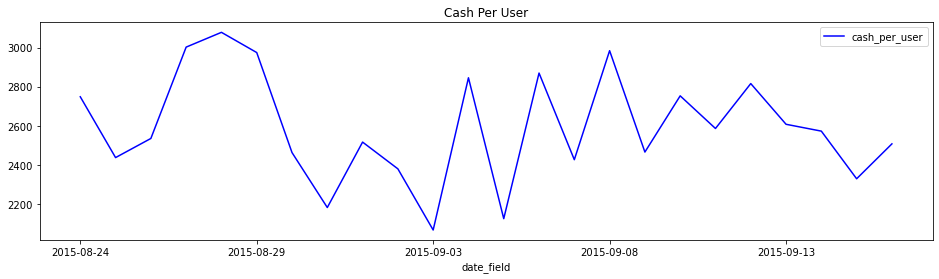

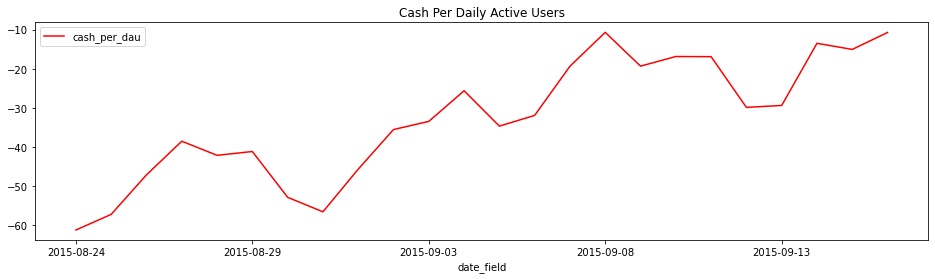

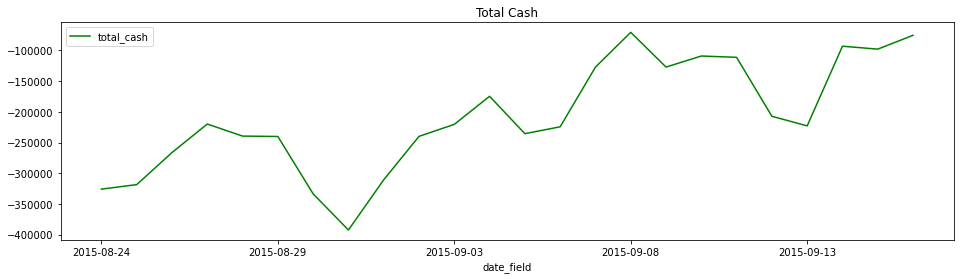

In [13]:
cash_df.pivot_table(index=['date_field'], values=['cash_per_user'], aggfunc='sum').plot(figsize=(16,4),color='b',title='Cash Per User')
cash_df.pivot_table(index=['date_field'], values=['cash_per_dau'], aggfunc='sum').plot(figsize=(16,4), color='r', title='Cash Per Daily Active Users')
cash_df.pivot_table(index=['date_field'], values=['total_cash'], aggfunc='sum').plot(figsize=(16,4), color='g', title='Total Cash')

## 1. Economy Terms:
- Spend refers to the player using coins to buy hints
- Purchase (Buy) refers to the player buying coins (IAP)
- Earn refers to the player earning coins due to his progress in the game.

In [14]:
# Summarized data at earn_type and variant_groups
cash_df.pivot_table(index=['earn_type','variant_group'], values=['cash_per_dau', 'cash_per_user', 'total_cash'], aggfunc='sum')

cash_per_dau  cash_per_user  total_cash
earn_type variant_group                                         
earn      1               1272.515562    1352.974681     7143541
          2               1312.112977    1394.566525     7813809
          3               1213.864820    1289.213616     9344945
purchase  1                235.564469   20140.380432     1309900
          2                257.735834   23173.436832     1536100
          3                255.405203   22495.142933     1967200
spend     1              -1786.556272   -2539.784861    -9998055
          2              -1802.577553   -2561.719160   -10714654
          3              -1743.134711   -2471.480877   -13386645

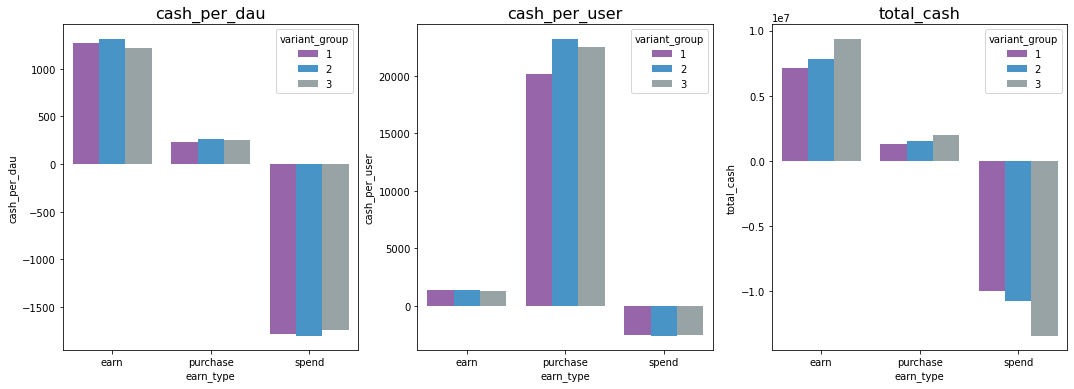

In [15]:
# Plotting the distribution of economic categories on various Versions in legend
pivot = cash_df.pivot_table(index=['earn_type','variant_group'], values=['cash_per_dau', 'cash_per_user', 'total_cash'], aggfunc='sum')
pdf = pd.DataFrame(pivot.to_records())
plt.figure(figsize=(18,6))
for i in range(2,5):
    plt.subplot(1,3,i-1)
    plt.title(pdf.columns[i], fontsize=16)
    sns.barplot(pdf.earn_type, pdf[pdf.columns[i]], hue=pdf.variant_group, palette=sns.color_palette(flatui)[:3])

In [16]:
# # Plotting the distribution of economic categories on various Versions in legend for averages
# pivot = cash_df.pivot_table(index=['earn_type','variant_group'], values=['cash_per_dau', 'cash_per_user'], aggfunc='mean')
# pdf = pd.DataFrame(pivot.to_records())
# plt.figure(figsize=(18,6))
# for i in range(2,5):
#     plt.subplot(1,3,i-1)
#     plt.title(pdf.columns[i], fontsize=16)
#     sns.barplot(pdf.earn_type, pdf[pdf.columns[i]], hue=pdf.variant_group, palette=sns.color_palette(flatui)[:3])

### Observations
- Users are spending more coins rather purchasing or earning which is expected
- As the population of variant 3 is high so the spends and earning are more than the other variants
- Though Variant 3 is leading the number of daily active users, we see little amount of spends and purchase when compared with Variant 2
- In terms of a company perspective the econony/revenue will grow through purchasing and spending coins per DAU/ Users so Variant 2 is leading the economy role even with less number of users compared with version 3

---

## 2. Engagement Actions:

- view: viewing a puzzle
- clear: solving a puzzle
- fail: failing on a puzzle
- use_hint: spending coins to reveal hints on a puzzle.

![](https://i.imgur.com/eyUl0FO.jpg)

In [17]:
print("Unique values of columns are")
print('----------------------------------------')
for i in action_df.columns:
    if action_df[i].nunique() < 50:
        print(f'{str(i)} : {sorted(action_df[i].unique())}')
        print('----------------------------------------')

Unique values of columns are
----------------------------------------
action_type : ['clear', 'fail', 'use_hint', 'view']
----------------------------------------
cli : [0]
----------------------------------------
date_field : ['08/24/2015', '08/25/2015', '08/26/2015', '08/27/2015', '08/28/2015', '08/29/2015', '08/30/2015', '08/31/2015', '09/01/2015', '09/02/2015', '09/03/2015', '09/04/2015', '09/05/2015', '09/06/2015', '09/07/2015', '09/08/2015', '09/09/2015', '09/10/2015', '09/11/2015', '09/12/2015', '09/13/2015', '09/14/2015', '09/15/2015', '09/16/2015']
----------------------------------------
experiment : ['content']
----------------------------------------
gid : [4]
----------------------------------------
variant_group : [1, 2, 3]
----------------------------------------
version : [2]
----------------------------------------


In [18]:
action_df.head()

,action_type,actions,actions_per_dau,actions_per_user,cli,date_field,dau,experiment,gid,users,variant_group,version
0,view,74708,9.068706,9.351358,0,09/16/2015,8238,content,4,7989,3,2
1,use_hint,13831,1.678927,2.504255,0,09/16/2015,8238,content,4,5523,3,2
2,fail,55098,6.668038,8.494912,0,09/05/2015,8263,content,4,6486,3,2
3,clear,76096,9.209246,13.234087,0,09/05/2015,8263,content,4,5750,3,2
4,use_hint,16879,1.895665,2.672419,0,09/13/2015,8904,content,4,6316,3,2


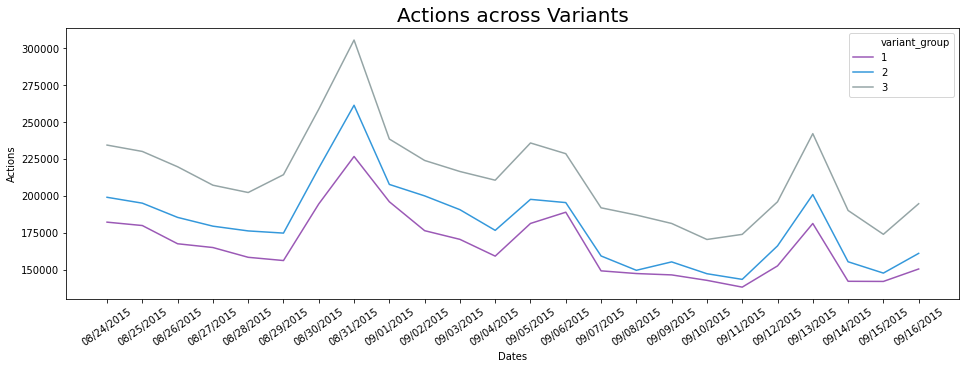

In [19]:
pivot = action_df.pivot_table(index=['date_field','variant_group'], values=['actions'], aggfunc='sum')
pdf = pd.DataFrame(pivot.to_records())
plt.figure(figsize=(16,5))
plt.title('Actions across Variants', fontsize=20)
plt.xticks(rotation=35)
sns.lineplot(pdf.date_field, pdf.actions, hue=pdf.variant_group, palette=sns.color_palette(flatui)[:3])
plt.xlabel('Dates')
plt.ylabel('Actions')
plt.show()

- As we have seen the population is high for variant 3 in the above analysis, Also users of Variant 3 are performing more actions compared to other 2 variants, So again the big player of game is variant 3

In [20]:
action_df.pivot_table(index=['action_type','variant_group'], values=['actions_per_dau', 'actions_per_user', 'actions'], aggfunc='sum')

actions  actions_per_dau  actions_per_user
action_type variant_group                                            
clear       1              1296149       231.454455        333.208389
            2              1416867       238.525509        345.304909
            3              1652907       215.341631        314.632491
fail        1               930428       165.987596        213.086744
            2               999981       168.127072        215.588497
            3              1190959       154.925850        198.863567
use_hint    1               265953        47.407337         67.699129
            2               281050        47.208243         67.500547
            3               350308        45.515723         64.919467
view        1              1504955       268.561856        274.862436
            2              1648064       277.228264        283.596893
            3              1934350       251.810190        257.374789

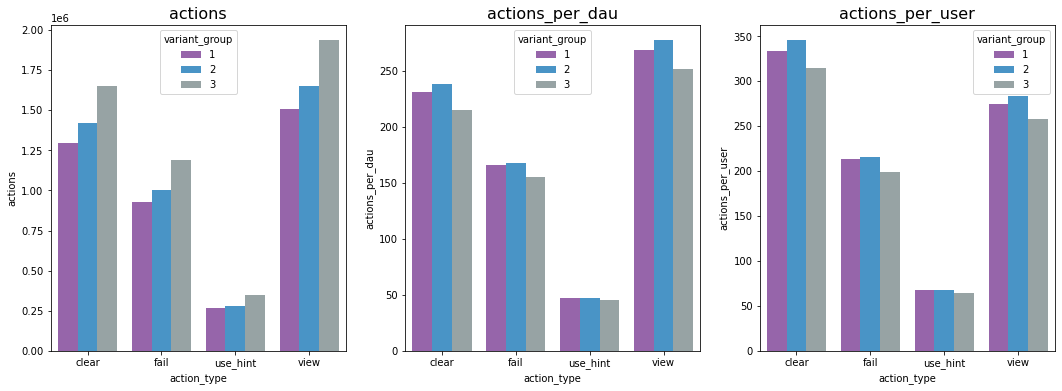

In [21]:
pivot = action_df.pivot_table(index=['action_type','variant_group'], values=['actions_per_dau', 'actions_per_user', 'actions'], aggfunc='sum')
pdf = pd.DataFrame(pivot.to_records())
plt.figure(figsize=(18,6))
for i in range(2,5):
    plt.subplot(1,3,i-1)
    plt.title(pdf.columns[i], fontsize=16)
    sns.barplot(pdf.action_type, pdf[pdf.columns[i]], hue=pdf.variant_group, palette=sns.color_palette(flatui)[:3])

### Observations:
- Similar to the economical situations above, We have got more numbers of Total Actions perfomed in case of Variant 3
- In terms of Actions performed per daily active user Variant 2 is leading the scene where More number of people are viewing the puzzle and expected the same range even for clearing or fail to solve a puzzle.
- Basically using hints means spending the coins from users basket where Version 2 leading the scene with almost equal values to version 1
- But at total level Version 3 users are more interactive but similarly version 2 is leading the game at user level action

---
### 3. Retention:
- dn: Percentage of people playing on Date=D+n out of people who installed on Date=D

![](https://i.imgur.com/9orbiAZ.jpg)

In [22]:
# Arranging the columns to look at d14, d21, d30 which are for 2 weeks, 3 weeks and a Month numbers
ret_df["d0(%)"] = 100 # Zeroth day assumed to have all users intact
ret_df = ret_df[['date_field', 'installs', 'variant_group', 'd0(%)', 'd1(%)', 'd2(%)',  'd3(%)', 'd4(%)', 'd5(%)', 'd6(%)', 'd7(%)', 'd14(%)', 'd21(%)', 'd30(%)']].sort_values(by='date_field')

In [23]:
ret_df.head()

,date_field,installs,variant_group,d0(%),d1(%),d2(%),d3(%),d4(%),d5(%),d6(%),d7(%),d14(%),d21(%),d30(%)
56,08/24/2015,622,1,100,64,45,37,33,29,29,27,17,14,0
53,08/24/2015,603,2,100,63,47,41,34,31,30,28,19,15,0
54,08/24/2015,742,3,100,64,48,39,32,26,26,28,17,16,0
6,08/25/2015,561,1,100,61,45,34,29,29,25,24,16,13,0
33,08/25/2015,763,3,100,59,45,37,31,29,29,26,18,15,0


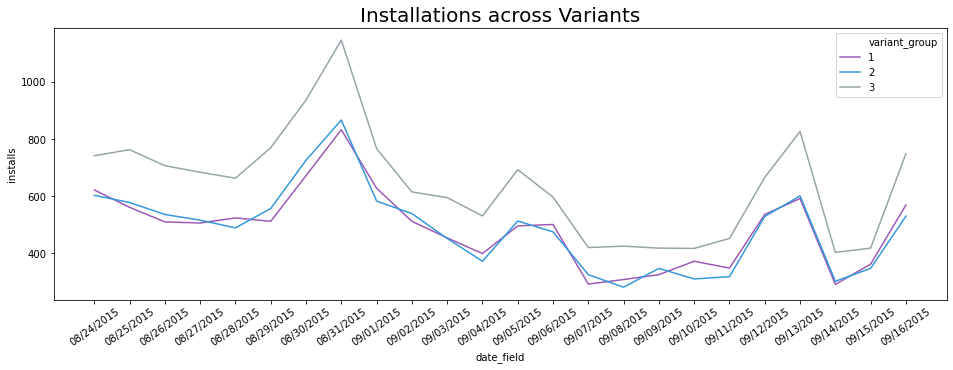

In [24]:
pivot = ret_df.pivot_table(index=['date_field','variant_group'], values=['installs'], aggfunc='sum')
pdf = pd.DataFrame(pivot.to_records())
plt.figure(figsize=(16,5))
plt.title('Installations across Variants', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Installs')
plt.xticks(rotation=35)
sns.lineplot(pdf.date_field, pdf.installs, hue=pdf.variant_group, palette=sns.color_palette(flatui)[:3])

- We can see from the above picture that Installs are more for Version 3 but the trend isn't maintained consistently
- Version 1 and Version 2 are haing similar number of installs across the period of 24 days

In [25]:
print("Unique values of columns are")
print('----------------------------------------')
for i in ret_df.columns:
    if ret_df[i].nunique() < 5:
        print(f'{str(i)} : {sorted(ret_df[i].unique())}')
        print('----------------------------------------')

Unique values of columns are
----------------------------------------
variant_group : [1, 2, 3]
----------------------------------------
d0(%) : [100]
----------------------------------------
d30(%) : [0]
----------------------------------------


In [26]:
# Checking the level of data
ret_df[ret_df.date_field=='09/04/2015']

,date_field,installs,variant_group,d0(%),d1(%),d2(%),d3(%),d4(%),d5(%),d6(%),d7(%),d14(%),d21(%),d30(%)
52,09/04/2015,372,2,100,66,50,36,35,33,29,27,1,0,0
0,09/04/2015,399,1,100,60,45,32,30,27,24,24,0,0,0
26,09/04/2015,531,3,100,61,47,34,34,27,28,25,0,0,0


##### Retention can be easily understood by plotting a heatmap similar to cohort charts

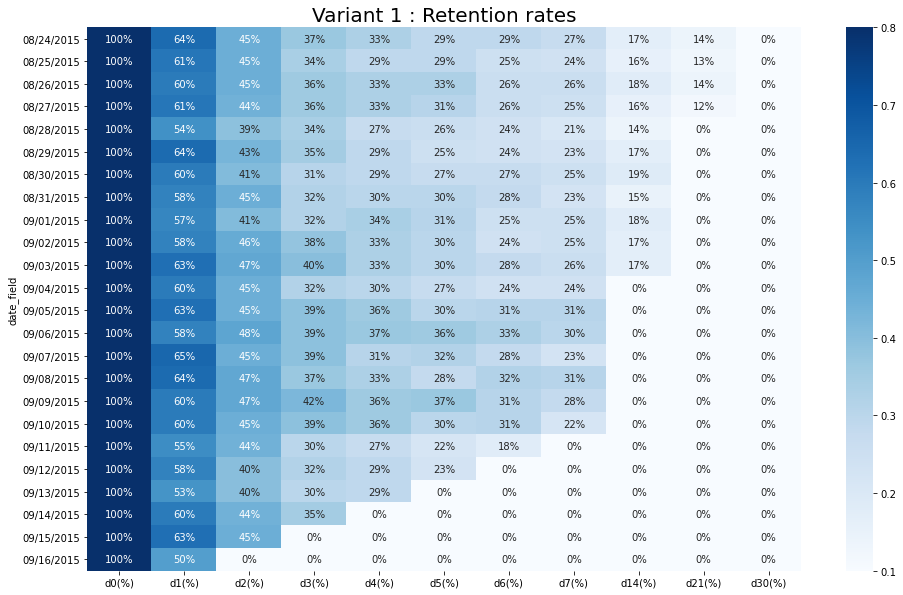

In [27]:
# Retention Level Cohort Chart
plt.figure(figsize=(16, 10))
variant_1 = ret_df[ret_df.variant_group == 1].drop(columns=['installs', 'variant_group']).set_index('date_field')
variant_1 = variant_1/100
plt.title('Variant 1 : Retention rates', fontsize=20)
sns.heatmap(data = variant_1, annot = True, fmt = '.0%',vmin = 0.1,vmax = 0.8,cmap = 'Blues')

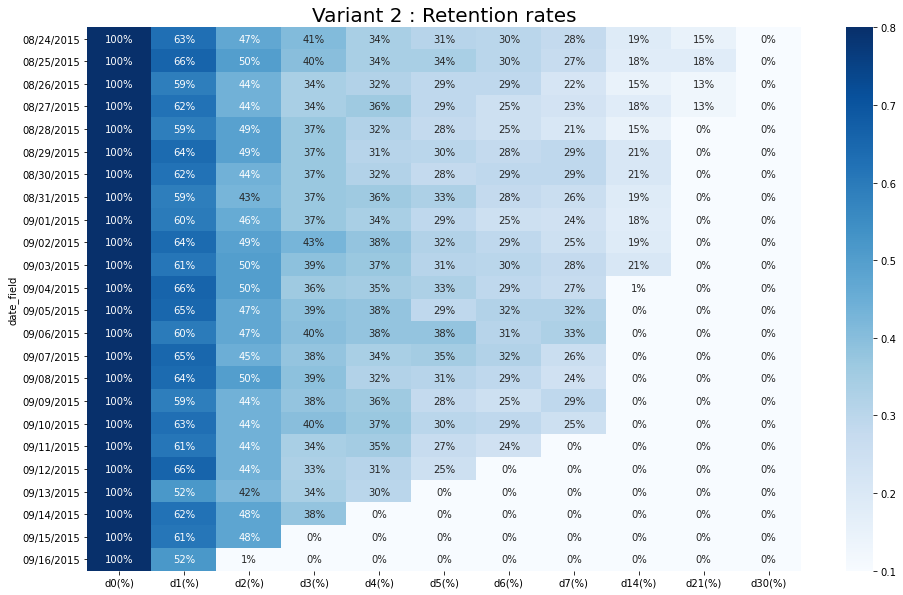

In [28]:
plt.figure(figsize=(16, 10))
variant_2 = ret_df[ret_df.variant_group == 2].drop(columns=['installs', 'variant_group']).set_index('date_field')
variant_2 = variant_2/100
plt.title('Variant 2 : Retention rates', fontsize=20)
sns.heatmap(data = variant_2, annot = True, fmt = '.0%',vmin = 0.1,vmax = 0.8,cmap = 'Blues')

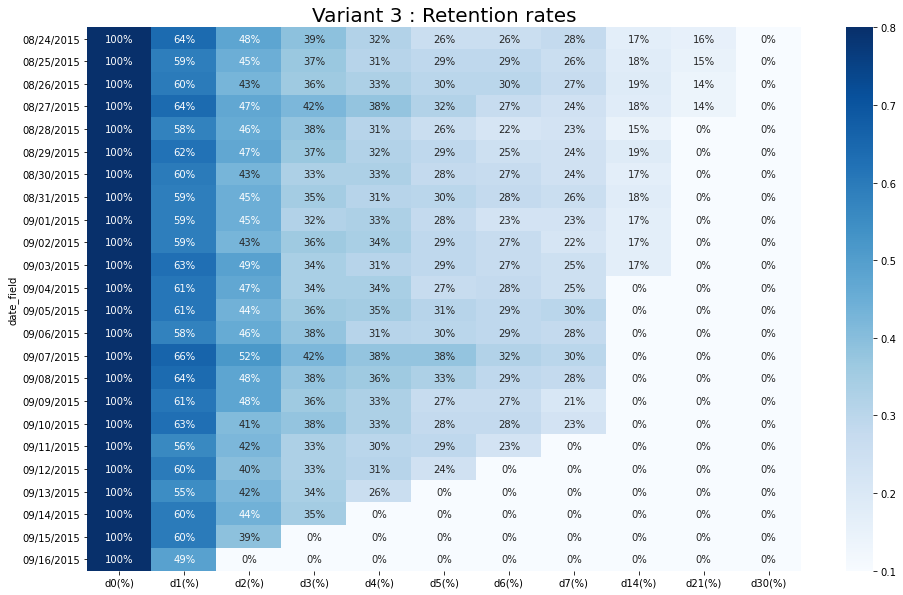

In [29]:
plt.figure(figsize=(16, 10))
variant_3 = ret_df[ret_df.variant_group == 3].drop(columns=['installs', 'variant_group']).set_index('date_field')
variant_3 = variant_3/100
plt.title('Variant 3 : Retention rates', fontsize=20)
sns.heatmap(data = variant_3, annot = True, fmt = '.0%',vmin = 0.1,vmax = 0.8,cmap = 'Blues')

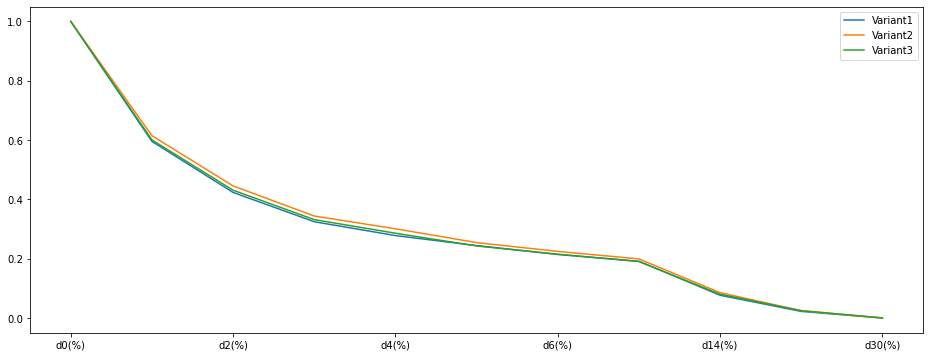

In [30]:
plt.figure(figsize=(16,6))
variant_1.mean(axis=0).plot()
variant_2.mean(axis=0).plot()
variant_3.mean(axis=0).plot()
plt.legend(['Variant1', 'Variant2', 'Variant3'])

##### From the above chart of Average retention rates through the time period, We can see that Attrition rate is very high and barely make out that Variant 2 is on top of remaining variants. So, Variant 2 is holding customers better than remaining variants

In [31]:
#Summarized data
# pivot1 = pd.DataFrame(cash_df.pivot_table(index=['date_field','variant_group'], values=['dau'], aggfunc='sum').to_records())
# pivot2 = pd.DataFrame(action_df.pivot_table(index=['date_field','variant_group'], values=['actions'], aggfunc='sum').to_records())
# pivot3 = pd.DataFrame(ret_df.pivot_table(index=['date_field','variant_group'], values=['installs'], aggfunc='sum').to_records())

In [32]:
#Summarized data
pivot1 = pd.DataFrame(cash_df.pivot_table(index=['variant_group'], values=['dau'], aggfunc='sum').to_records())
pivot2 = pd.DataFrame(action_df.pivot_table(index=['variant_group'], values=['actions'], aggfunc='sum').to_records())
pivot3 = pd.DataFrame(ret_df.pivot_table(index=['variant_group'], values=['installs'], aggfunc='sum').to_records())

In [33]:
data_frames = [pivot1,pivot2,pivot3]
smz = reduce(lambda left,right: pd.merge(left,right,on=['variant_group'],how='inner'), data_frames)
smz

,variant_group,dau,actions,installs
0,1,406293,3997485,11725
1,2,431469,4345962,11696
2,3,557241,5128524,15406


## 4. Conclusion

<h3 align="center">Variant Group Ranks in terms of economy balance, engagement and retention </h3>

|Rank |Variant|
|:-----|:----:|
|1 |Variant Group 2|
|2 |Variant Group 3|
|3 |Variant Group 1|

* Economically We have seen that **Variant Group 2 is performing better** because the users are purchasing and spending more coins even though the population is lesser than Variant 3.
* Engagement/Activity wise Variant 2 based daily active users are performing more actions in terms of all 4 cateories of actions (View, Clear, Fail, Use Hint)
* Variant 3 is tops installations when compared to remaining variants (expected because of its huge population size)
* Retention wise Variant 2 users are little sticky to the group when compared with others.
* As per the data Variants Group 1 is performing worse than the other 2 variants

---

##### Question 2:
- 2. Rank the variants in the order of their difficulty

In [34]:
# Python program to Find day of the week for a given date 
import calendar 
def findDay(date): 
    year, month, day = (int(i) for i in date.split('-'))	 
    dayNumber = calendar.weekday(year, month, day) 
    days =["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] 
    return (days[dayNumber],dayNumber)
cash_df['Day'] = cash_df.date_field.apply(lambda x: findDay(x)[0])
cash_df['Day_Number'] = cash_df.date_field.apply(lambda x: findDay(x)[1])

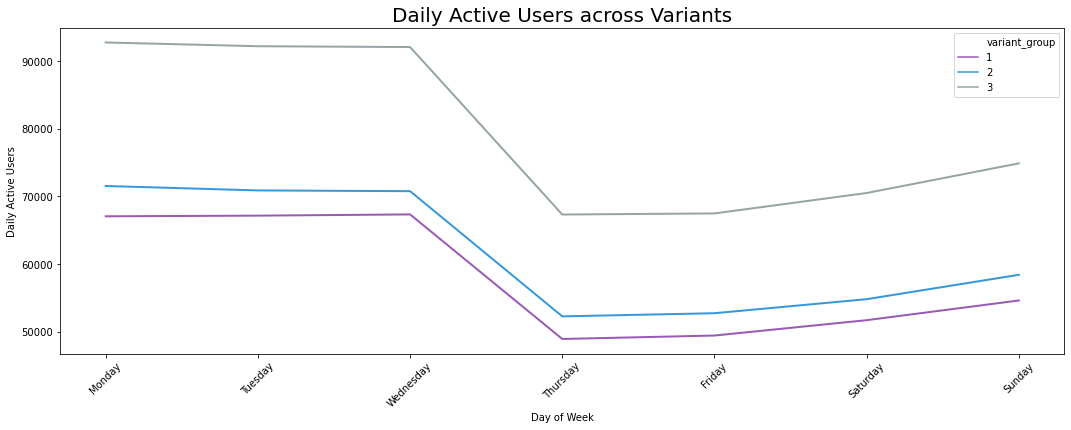

In [35]:
# Plotting the distribution of DAU across various Versions in legend on the day of week
a1 = cash_df.pivot_table(index=['Day','Day_Number','variant_group'], values=['dau','users'], aggfunc='sum')
a2 = pd.DataFrame(a1.to_records())
a2 = a2.sort_values(['Day_Number']).reset_index(drop=True)
plt.figure(figsize=(18,6))
sns.lineplot(a2.Day, a2.dau, hue=a2.variant_group, palette=sns.color_palette(flatui)[:3], linewidth=2, sort=False)
plt.title('Daily Active Users across Variants', fontsize=20)
plt.ylabel('Daily Active Users')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.show()

### Observations
- From the above graph it's clear that Users are playing more in weekdays rather than weekends. (Probably people are relaxing by  during office hours ☻)

![](https://i.imgur.com/ZTmijAO.jpg)

In [36]:
# Summarized data at earn_type and variant_groups
cash_df.pivot_table(index=['variant_group','earn_type'], values=['cash_per_dau', 'cash_per_user', 'total_cash'], aggfunc='sum')

cash_per_dau  cash_per_user  total_cash
variant_group earn_type                                         
1             earn        1272.515562    1352.974681     7143541
              purchase     235.564469   20140.380432     1309900
              spend      -1786.556272   -2539.784861    -9998055
2             earn        1312.112977    1394.566525     7813809
              purchase     257.735834   23173.436832     1536100
              spend      -1802.577553   -2561.719160   -10714654
3             earn        1213.864820    1289.213616     9344945
              purchase     255.405203   22495.142933     1967200
              spend      -1743.134711   -2471.480877   -13386645

In [37]:
difficulty = pd.DataFrame(action_df.pivot_table(index=['variant_group','action_type'], values=['actions_per_dau', 'actions_per_user', 'actions'], aggfunc='sum').to_records())
difficulty = difficulty.sort_values(['actions']).reset_index(drop=True)

In [38]:
difficulty['daily_active_users'] = difficulty.actions/difficulty.actions_per_dau
difficulty['users'] = difficulty.actions/difficulty.actions_per_user

In [39]:
difficulty

,variant_group,action_type,actions,actions_per_dau,actions_per_user,daily_active_users,users
0,1,use_hint,265953,47.407337,67.699129,5609.954434,3928.455297
1,2,use_hint,281050,47.208243,67.500547,5953.409442,4163.669941
2,3,use_hint,350308,45.515723,64.919467,7696.417389,5396.039365
3,1,fail,930428,165.987596,213.086744,5605.406791,4366.428347
4,2,fail,999981,168.127072,215.588497,5947.769089,4638.378262
5,3,fail,1190959,154.925850,198.863567,7687.283929,5988.824490
6,1,clear,1296149,231.454455,333.208389,5600.017502,3889.905068
7,2,clear,1416867,238.525509,345.304909,5940.106812,4103.234454
8,1,view,1504955,268.561856,274.862436,5603.755583,5475.302556
9,2,view,1648064,277.228264,283.596893,5944.790670,5811.290746


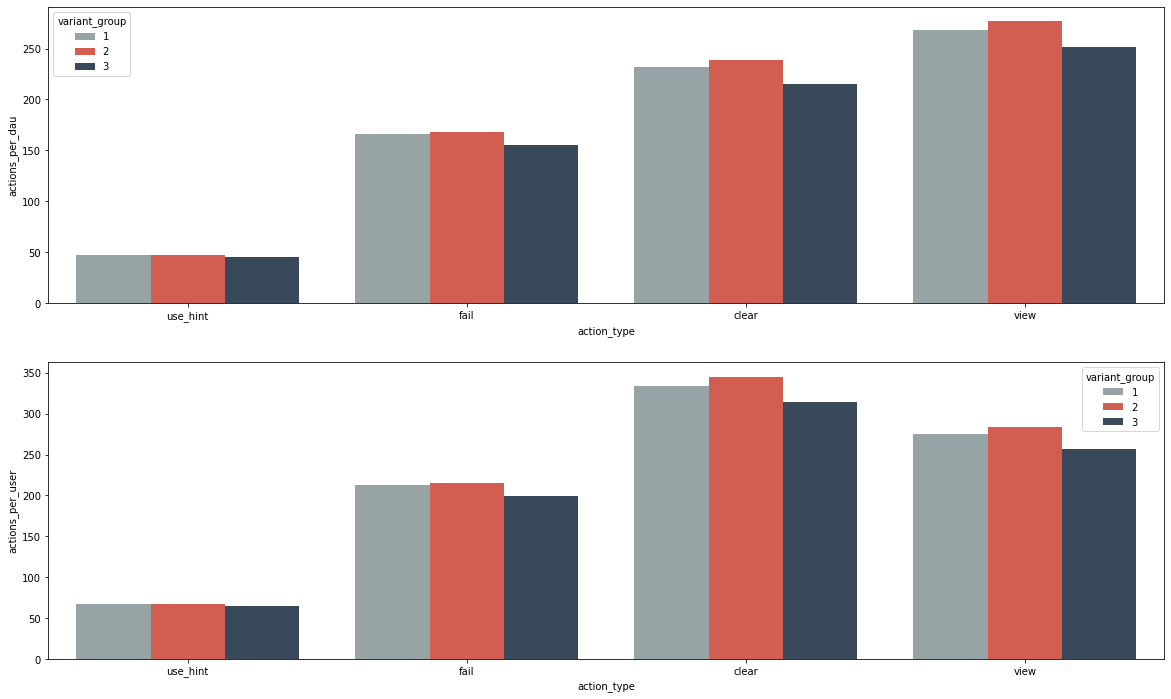

In [40]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
sns.barplot(difficulty.action_type, difficulty.actions_per_dau, hue=difficulty.variant_group, palette=sns.color_palette(flatui)[2:5])
plt.subplot(2,1,2)
sns.barplot(difficulty.action_type, difficulty.actions_per_user, hue=difficulty.variant_group, palette=sns.color_palette(flatui)[2:5])

### Observations:
- Difficulty: Basically users will feel it difficult if they are unable to clear the puzzle/game
- From the above picture we can clearly see that more actions are perfomed in terms of **FAIL**  are in **Variant Group 2**
- **Variant Group 3** looks easier than other versions as users are less in fail numbers
- Difficulty can be determined by USE_HINT also as people are taking help from system as they couldn't find the solution. But the numbers look quite same for all variants so cannot conclude from USE_HINT

<h3 align="center">Variant Group Ranks in terms of difficulty</h3>

|Rank |Variant|
|:-----|:----:|
|1 |Variant Group 2|
|2 |Variant Group 1|
|3 |Variant Group 3|